### **INITIALIZATION:**
- I use these three lines of code on top of my each notebooks because it will help to prevent any problems while reloading the same project. And the third line of code helps to make visualization within the notebook.

In [1]:
#@ INITIALIZATION: 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**LIBRARIES AND DEPENDENCIES:**
- I have downloaded all the libraries and dependencies required for the project in one particular cell.

In [3]:
#@ INSTALLING DEPENDENCIES: UNCOMMENT BELOW: 
# !pip install -Uqq fastbook
# import fastbook
# fastbook.setup_book()

In [31]:
#@ DOWNLOADING LIBRARIES AND DEPENDENCIES: 
from fastbook import *                              # Getting all the Libraries. 
from fastai.callback.fp16 import *
from fastai.text.all import *                       # Getting all the Libraries.
from fastai.vision.all import *                     # Getting all the Libraries. 

**GETTING THE DATASET:**
- I will get the **IMDB Dataset** here.

In [6]:
#@ GETTING THE DATASET: 
path = untar_data(URLs.IMDB)                       # Getting Path to the Dataset. 
path.ls()                                          # Inspecting the Path.

(#7) [Path('/root/.fastai/data/imdb/README'),Path('/root/.fastai/data/imdb/train'),Path('/root/.fastai/data/imdb/unsup'),Path('/root/.fastai/data/imdb/tmp_clas'),Path('/root/.fastai/data/imdb/test'),Path('/root/.fastai/data/imdb/imdb.vocab'),Path('/root/.fastai/data/imdb/tmp_lm')]

### **IMDB DATASET: NATURAL LANGUAGE PROCESSING**

**DATABLOCK AND DATALOADERS:**

In [7]:
#@ CREATING THE DATALOADERS: IMDB FORMAT DATASET: 
dls = TextDataLoaders.from_folder(path, valid="test")                       # Initializing DataLoaders. 

In [8]:
#@ CREATING THE DATALOADERS: 
path = untar_data(URLs.IMDB)                                                # Path to the Dataset. 
dls = DataBlock(blocks=(TextBlock.from_folder(path), CategoryBlock),        # Initializing Text Block. 
                get_y=parent_label,                                         # Getting Labels. 
                get_items=partial(get_text_files,folders=["train","test"]), # Getting Text Files. 
                splitter=GrandparentSplitter(valid_name="test")             # Splitting the Data. 
                ).dataloaders(path)                                         # Initializing Data Loaders. 

**TRANSFORMS:**

In [9]:
#@ GETTING THE TEXT DATA: 
files = get_text_files(path, folders=["train", "test"])                     # Getting Text Files. 
txts = L(o.open().read() for o in files[:2000])                             # Getting List of Texts. 

In [10]:
#@ INITIALIZING TOKENIZATION: 
tok = Tokenizer.from_folder(path)                                           # Initializing Tokenizer. 
tok.setup(txts)                                                             # Getting Tokens. 
toks = txts.map(tok)                                                        # Getting Tokens. 
toks[0]                                                                     # Inspecting Tokens. 

(#305) ['xxbos','xxmaj','not','only','does','this','movie','have','a','poor'...]

In [11]:
#@ INITIALIZING NUMERICALIZATION: 
num = Numericalize()                                                        # Initializing Numericalizer. 
num.setup(toks)
nums = toks.map(num)                                                        # Numericalization. 
nums[0][:10]                                                                # Inspection. 

TensorText([  2,   8,  35,  74,  87,  20,  27,  40,  12, 254])

In [12]:
#@ CONVERTING INTEGERS INTO STRING TOKENS: 
nums_dec = num.decode(nums[0][:20]); nums_dec                               # Decoding Integers. 

(#20) ['xxbos','xxmaj','not','only','does','this','movie','have','a','poor'...]

In [13]:
#@ GETTING TOKENS: 
tok.decode(nums_dec)

'xxbos xxmaj not only does this movie have a poor plot , bad direction , and terrible acting , its'

In [14]:
#@ IMPLEMENTATION OF TRANSFORMS: TOKENIZATION IN TUPLES: 
tok((txts[0], txts[1]))                                                     # Implemetation of Tokenization. 

((#305) ['xxbos','xxmaj','not','only','does','this','movie','have','a','poor'...],
 (#146) ['xxbos','xxmaj','this','movie','sucked','plain','and','simple','.','xxmaj'...])

**CUSTOM TRANSFORM FUNCTION:**

In [15]:
#@ WRITING CUSTOM TRANSFORM FUNCTION: 
def f(x:int): return x + 1                                 # Defining Function. 
tfm = Transform(f)                                         # Initializing a Transform. 
tfm(2.0), tfm(2)                                           # Inspection. 

(2.0, 3)

**DECORATOR:**
- Python has a special syntax for passing a function to another function or something that behaves like a function which is also known as callable in **Python** is called a **Decorator**. A **Decorator** is used by prepending a callable with @ and placing it before the function definition. 

In [16]:
#@ WRITING CUSTOM TRANSFORM FUNCTION WITH DECORATORS: 
@Transform
def f(x:int): return x + 1                                 # Defining Function. 
tfm(2.0), tfm(2)                                           # Inspection. 

(2.0, 3)

In [17]:
#@ WRITING CUSTOM TRANSFORM FUNCTION WITH SETUP AND DECODE: 
class NormalizeMean(Transform):                            # Initializing Transform Subclass. 
    def setups(self, items):                               # Defining Setup Function. 
        self.mean = sum(items) / len(items)                # Getting Mean of Items. 
    def encodes(self, x): return x - self.mean             # Defining Encode Function. 
    def decodes(self, x): return x + self.mean             # Defining Decode Function. 

#@ IMPLEMENTATION OF NORMALIZE MEAN CLASS: 
tfm = NormalizeMean()                                      # Initializing Class. 
tfm.setup([1, 2, 3, 4, 5])                                 # Initializing Object. 
start = 2
y = tfm(start)                                             # Implementation of Class. 
z = tfm.decode(y)                                          # Implementation of Decode Function. 
tfm.mean, y, z                                             # Inspection. 

(3.0, -1.0, 2.0)

**PIPELINE**
- **Pipeline** class helps to compose several **Transforms** together. 

In [18]:
#@ INITIALIZING PIPELINE CLASS: 
tfms = Pipeline([tok, num])                               # Initializing Tokenizer and Numericalization. 
t = tfms(txts[0]); t[:20]                                 # Implementation of Pipeline Class. 

TensorText([  2,   8,  35,  74,  87,  20,  27,  40,  12, 254, 109,  11,  78, 457,  11,  13, 270, 116,  11, 127])

In [19]:
#@ IMPLEMENTATION OF PIPELINE CLASS: 
tfms.decode(t)[:100]                                      # Initializing Decoder. 

'xxbos xxmaj not only does this movie have a poor plot , bad direction , and terrible acting , its op'

**TRANSFORMED COLLECTIONS:**

In [20]:
#@ IMPLEMENTATION OF TRANSFORMED LISTS: MULTIPLE TRANSFORMS: 
tls = TfmdLists(files, [Tokenizer.from_folder(path), Numericalize])      # Implementation of Transformed Lists. 
t = tls[0]; t[:20]                                                       # Inspection. 
tls.decode(t)[:100]                                                      # Initializing Decoding. 

'xxbos xxmaj not only does this movie have a poor plot , bad direction , and terrible acting , its op'

In [21]:
#@ INSPECTING THE DECODED INFORMATION: 
tls.show(t)

xxbos xxmaj not only does this movie have a poor plot , bad direction , and terrible acting , its opens up a whole new meaning to racism . 

 xxmaj in this film " white " chicks are the sluts , " white " boys are the wana - be gangsters , and successful ( yes again ) " white " businessmen are revolting toilet xxunk . 

 i just wonder what would happen if i made the exact same movie with the exact same story line and script , only i made it about xxmaj caucasians . " he dude , its good to finally see xxunk stopped dating those black chicks " . 

 xxmaj nobody seems to notice it , but watch this film again and you 'll vomit at how they have portrayed the new xxmaj zealand " white boys " . xxmaj all of a sudden its white folks who are the main cause of gang aggression , and whores out for a quick bang . xxmaj only xxmaj xxunk girls have a heart , there 's no such thing as a non - slutty white girl . 

 xxmaj it disgusts me that they could n't make this film without giving the xxmaj caucas

In [22]:
#@ CREATING TRAINING AND VALIDATION SET: 
cut = int(len(files)*0.8)                                                # Getting Ratios.
splits = [list(range(cut)), list(range(cut, len(files)))]                # Getting Splitting Ranges. 
tls = TfmdLists(files, [Tokenizer.from_folder(path), Numericalize], 
                splits=splits)                                           # Transformed Lists with Splits. 
tls.valid[0][:20]                                                        # Inspecting Transformed Data. 

TensorText([   2,    8, 1416,    9,  857, 1685,   11,   12,  900,    9,  850,   11,   12,  129,   49,    8, 2370,  359,   11,   19])

In [23]:
#@ IMPLEMENTATION OF TRANSFORMS: 
lbls = files.map(parent_label)                                           # Getting Labels. 
cat = Categorize()                                                       # Initializing Categorize Method. 
cat.setup(lbls)                                                          # Initializing Categorize Object. 
cat.vocab, cat(lbls[0])                                                  # Inspecting the Categories. 

(['neg', 'pos'], TensorCategory(0))

In [24]:
#@ IMPLEMENTATION OF TRANSFROMED LISTS: CATEGORIZE: 
tls_y = TfmdLists(files, [parent_label, Categorize()])                   # Initializing Transformed Lists. 
tls_y[0]                                                                 # Inspection. 

TensorCategory(0)

**DATASETS:**
- **Datasets** will apply two or more pipelines in parallel to the same raw object and build a tuple with the result. It will automatically do the setup and index into a **Datasets**. 

In [25]:
#@ IMPLEMENTATION OF DATASETS: 
x_tfms = [Tokenizer.from_folder(path), Numericalize]                   # Initializing Transformations.
y_tfms = [parent_label, Categorize()]                                  # Initializing Target Transformations.    
dsets = Datasets(files, [x_tfms, y_tfms])                              # Initializing Datasets. 
x, y = dsets[0]                                                        # Getting Data. 
x[:20], y                                                              # Inspection. 

(TensorText([  2,   8,  38,  83,  93,  20,  30,  42,  13, 361, 131,  11,  98, 471,  11,  12, 408, 138,  11, 115]),
 TensorCategory(0))

In [26]:
#@ IMPLEMENTATION OF DATASETS WITH SPLITTING:
x_tfms = [Tokenizer.from_folder(path), Numericalize]                   # Initializing Transformations.
y_tfms = [parent_label, Categorize()]                                  # Initializing Target Transformations.    
dsets = Datasets(files, [x_tfms, y_tfms], splits=splits)               # Initializing Datasets. 
x, y = dsets[0]                                                        # Getting Data. 
x[:20], y                                                              # Inspection. 

(TensorText([  2,   8,  38,  83,  93,  20,  30,  42,  13, 361, 131,  11,  98, 471,  11,  12, 408, 138,  11, 115]),
 TensorCategory(0))

In [27]:
#@ DECODING DATASETS: 
t = dsets.valid[0]                                                      # Getting Data. 
dsets.decode(t)                                                         # Initializing Decoding. 

('xxbos xxmaj finding the premise intriguing , and reading the reviews , and being an xxmaj angel fan , i watched this movie . xxmaj it \'s sexy and original , and quite entertaining . xxmaj david xxmaj boreanaz is xxmaj keith . xxmaj he \'s a hunky married man , stay at home xxmaj dad , and he feels a little inadequate in his marriage . xxmaj he makes the mistake of penetrating a close circle of teenage girls who are fascinated with the idea of doing it with an older man . xxmaj they \'ll do anything to get into his bed , including beg , lie , and blackmail , but they mostly try to push his buttons . xxmaj the nuttiness that ensues sends xxmaj keith reeling , and pushes friendships to the edge . xxmaj david xxmaj boreanaz shows a little skin in this one-- and he \'s looking hot . xxmaj yes - he plays a sleazy cheat - but he shows enough vulnerability and tenderness toward the goofy teens that you end up cheering for him in the end . xxmaj one more thing , when someone moans " oh yeah 

In [28]:
#@ CREATING DATA LOADERS: 
dls = dsets.dataloaders(bs=64, before_batch=pad_input)                   # Initializing Data Loaders. 

In [29]:
#@ PREPARING DATA FOR TEXT CLASSIFICATION: FINAL CODE: 
tfms = [[Tokenizer.from_folder(path), Numericalize], 
        [parent_label, Categorize()]]                                    # Initializing Transformations. 
files = get_text_files(path, folders=["train", "test"])                  # Getting Text Files. 
splits = GrandparentSplitter(valid_name="test")(files)                   # Splitting the Datasets. 
dsets = Datasets(files, tfms, splits=splits)                             # Initializing Datasets. 
dls = dsets.dataloaders(dl_type=SortedDL, before_batch=pad_input)        # Initializing Data Loaders. 

In [30]:
#@ PREPARING DATA FOR TEXT CLASSIFICATION: DATA BLOCK:
path = untar_data(URLs.IMDB)                                             # Path to the Dataset. 
dls = DataBlock(blocks=(TextBlock.from_folder(path), CategoryBlock),     # Initializing Text Block. 
                get_y=parent_label,                                      # Target Label. 
                get_items=partial(get_text_files, 
                                  folders=["train", "test"]),            # Getting Text Files. 
                splitter=GrandparentSplitter(valid_name="test")          # Splitting the Data. 
                ).dataloaders(path)                                      # Initializing Data Loaders. 

### **SIAMESE PAIR: COMPUTER VISION**

**GETTING THE DATASET:**

In [33]:
#@ GETTING THE DATASET: 
path = untar_data(URLs.PETS)                              # Path to the Dataset. 
files = get_image_files(path/"images")                    # Getting Image Files. 

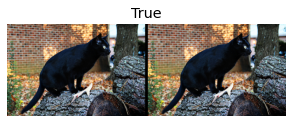

In [38]:
#@ CREATING SIAMESE IMAGE OBJECT: SUBCLASSES TUPLE: 
class SiameseImage(fastuple):                             # Defining Class. 
    def show(self, ctx=None, **kwargs):                   # Defining Function. 
        img1, img2, same_breed = self                     # Initialization. 
        if not isinstance(img1, Tensor):
            if img2.size != img1.size:                    # Inspecting Size. 
                img2 = img2.resize(img1.size)             # Resizing. 
            t1, t2 = tensor(img1), tensor(img2)           # Converting into Tensors. 
            t1, t2 = t1.permute(2,0,1),t2.permute(2,0,1)  # Changing Dimensions. 
        else: t1, t2 = img1, img2 
        line = t1.new_zeros(t1.shape[0], t1.shape[1], 10)
        return show_image(torch.cat([t1,line,t2],dim=2), 
                          title=same_breed, ctx=ctx)      # Inspection. 

#@ IMPLEMENTATION OF SIAMESE IMAGE OBJECT: 
img = PILImage.create(files[0])                           # Getting an Image. 
s = SiameseImage(img, img, True)                          # Initializing Object. 
s.show();                                                 # Inspecting Image. 

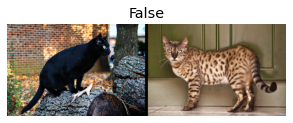

In [40]:
#@ IMPLEMENTATION OF SIAMESE IMAGE OBJECT: DIFFERENT:
img1 = PILImage.create(files[1])                          # Getting an Image. 
s1 = SiameseImage(img, img1, False)                       # Initializing Object. 
s1.show();                                                # Inspecting Image. 

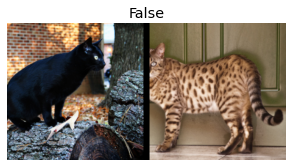

In [41]:
#@ IMPLEMENTATION OF TRANSFORMS IN SIAMESE: 
s2 = Resize(224)(s1)                                      # Resizing Image. 
s2.show();                                                # Inspecting Image. 